### 📌MNIST 데이터셋을 활용한 손글씨 숫자 인식

In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
mnist = load_data()
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = mnist

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
import matplotlib.pyplot as plt

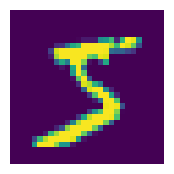

In [7]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [9]:
model = Sequential()

In [10]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'adam',
             metrics = ['acc'],
             loss = 'sparse_categorical_crossentropy')

In [13]:
history = model.fit(X_train, y_train,
          validation_split=0.2,
         epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3256 - acc: 0.9069 - val_loss: 0.1630 - val_acc: 0.9538
Epoch 2/10
1500/1500 [==============================] - 2s 993us/step - loss: 0.1439 - acc: 0.9577 - val_loss: 0.1257 - val_acc: 0.9618
Epoch 3/10
1500/1500 [==============================] - 1s 988us/step - loss: 0.1043 - acc: 0.9691 - val_loss: 0.1162 - val_acc: 0.9656
Epoch 4/10
1500/1500 [==============================] - 1s 995us/step - loss: 0.0816 - acc: 0.9759 - val_loss: 0.1046 - val_acc: 0.9696
Epoch 5/10
1500/1500 [==============================] - 2s 999us/step - loss: 0.0673 - acc: 0.9794 - val_loss: 0.1027 - val_acc: 0.9697
Epoch 6/10
1500/1500 [==============================] - 1s 990us/step - loss: 0.0538 - acc: 0.9833 - val_loss: 0.1120 - val_acc: 0.9668
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0451 - acc: 0.9859 - val_loss: 0.0965 - val_acc: 0.9722
Epoch 8/10
1500/1500 [==============================

In [14]:
import pandas as pd

In [15]:
history_df = pd.DataFrame(history.history)
history_df

,loss,acc,val_loss,val_acc
0,0.325621,0.906875,0.162973,0.953750
1,0.143882,0.957687,0.125718,0.961833
2,0.104297,0.969083,0.116179,0.965583
3,0.081621,0.975917,0.104647,0.969583
4,0.067257,0.979437,0.102683,0.969750
5,0.053795,0.983271,0.111992,0.966750
6,0.045128,0.985854,0.096544,0.972250
7,0.039132,0.987083,0.097233,0.974083
8,0.032612,0.989875,0.106073,0.972667
9,0.028558,0.990583,0.110996,0.971167


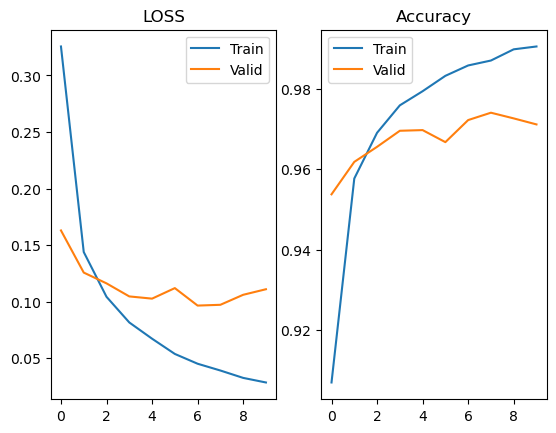

In [16]:
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])
plt.title('LOSS')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_df['acc'])
plt.plot(history_df['val_acc'])
plt.title('Accuracy')
plt.legend(['Train', 'Valid'])
plt.show()

In [17]:
y_pre = model.predict(X_test)
y_pre

313/313 [==============================] - 0s 548us/step


array([[3.7727929e-08, 2.2838745e-07, 9.7588122e-07, ..., 9.9990630e-01,
        1.5341510e-06, 1.7223066e-06],
       [5.0137308e-09, 8.9262849e-06, 9.9999082e-01, ..., 6.8325448e-09,
        2.8039357e-10, 3.0819455e-19],
       [3.2870965e-05, 9.9759102e-01, 7.5935357e-05, ..., 9.8119467e-04,
        5.3405523e-04, 3.0775944e-04],
       ...,
       [1.0346430e-12, 2.9921197e-09, 1.3665333e-13, ..., 1.6050318e-08,
        1.4118280e-09, 7.5036747e-05],
       [7.8243273e-11, 3.8911239e-11, 6.7889033e-14, ..., 2.4460512e-13,
        4.1845936e-08, 1.3471265e-11],
       [1.0643130e-09, 7.0789370e-13, 8.8296246e-14, ..., 4.2401659e-16,
        7.9976505e-14, 3.7138532e-13]], dtype=float32)

In [19]:
import numpy as np

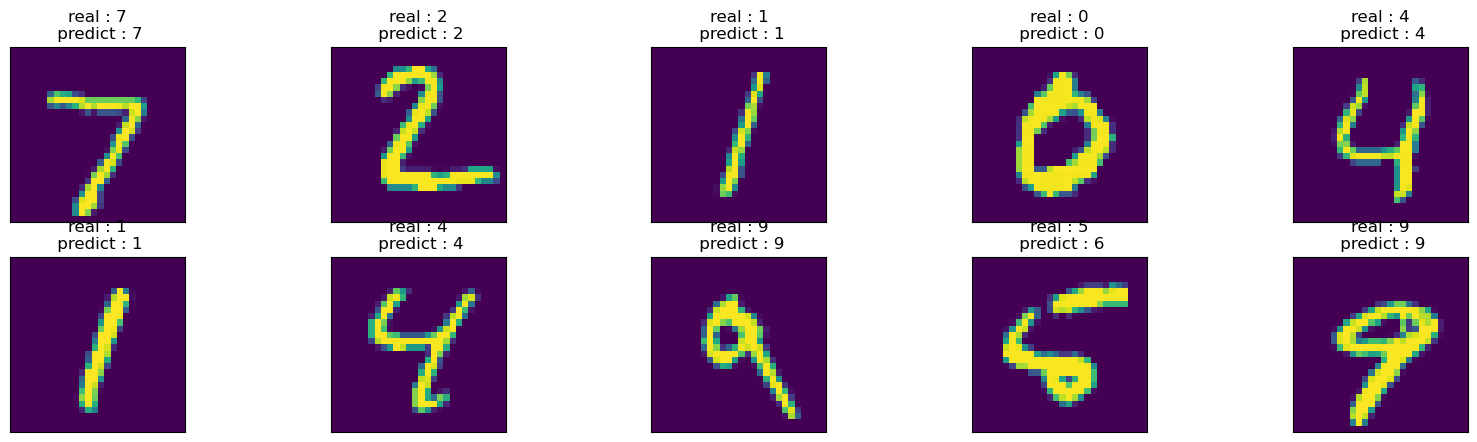

In [20]:
fig = plt.figure(figsize=(20, 5))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_test[i])
    plt.title(f'real : {y_test[i]}\n predict : {np.argmax(y_pre[i])}')

### 📌합성곱 신경망 모델

In [21]:
import tensorflow as tf

In [22]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [23]:
# mnist 데이터 셋에 채널 추가
print(X_train.shape, X_test.shape)

X_train_in = X_train[..., tf.newaxis]
X_test_in = X_test[..., tf.newaxis]

print(X_train_in.shape, X_test_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [24]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [29]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>

In [30]:
model.layers

In [31]:
model.compile(optimizer='adam',
             metrics=['acc'],
             loss='sparse_categorical_crossentropy')

In [32]:
history = model.fit(X_train, y_train,
         epochs=10,
         validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2307 - acc: 0.9344 - val_loss: 0.0976 - val_acc: 0.9738
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0812 - acc: 0.9764 - val_loss: 0.0806 - val_acc: 0.9768
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0629 - acc: 0.9810 - val_loss: 0.0668 - val_acc: 0.9812
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0515 - acc: 0.9844 - val_loss: 0.0692 - val_acc: 0.9800
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0439 - acc: 0.9865 - val_loss: 0.0679 - val_acc: 0.9808
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0385 - acc: 0.9883 - val_loss: 0.0669 - val_acc: 0.9818
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0322 - acc: 0.9901 - val_loss: 0.0653 - val_acc: 0.9807
Epoch 8/10
1500/1500 [==============================] - 8s 5ms

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0596 - acc: 0.9831


[0.059599634259939194, 0.9830999970436096]

In [34]:
history_df = pd.DataFrame(history.history)
history_df

,loss,acc,val_loss,val_acc
0,0.230740,0.934354,0.097605,0.973833
1,0.081217,0.976438,0.080598,0.976833
2,0.062948,0.981021,0.066793,0.981250
3,0.051451,0.984417,0.069186,0.980000
4,0.043883,0.986521,0.067908,0.980750
5,0.038458,0.988292,0.066936,0.981833
6,0.032182,0.990125,0.065262,0.980667
7,0.027934,0.990958,0.066643,0.982917
8,0.023259,0.993292,0.069023,0.981917
9,0.020989,0.993479,0.068128,0.981917


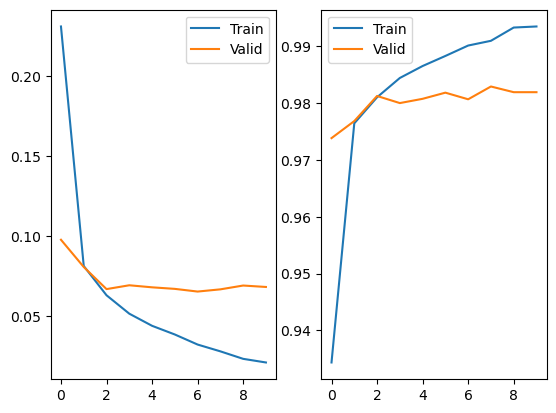

In [35]:
plt.subplot(1, 2, 1)
plt.plot(history_df.loss)
plt.plot(history_df.val_loss)
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_df.acc)
plt.plot(history_df.val_acc)
plt.legend(['Train', 'Valid'])

plt.show()

### 📌홀수짝수 판별

In [36]:
y_train_odd = []
for i in y_train:
    if i % 2 != 0:
        y_train_odd.append(1)
    else:
        y_train_odd.append(0)

In [37]:
y_train_odd = np.array(y_train_odd)

In [38]:
y_train_odd.shape

(60000,)

In [39]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [40]:
y_test_odd = []
for i in y_test:
    if i % 2 == 0:
        y_test_odd.append(0)
    else:
        y_test_odd.append(1)

In [41]:
y_test_odd = np.array(y_test_odd)

In [42]:
y_test_odd.shape

(10000,)

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate

In [44]:
inputs = Input(shape = (28, 28, 1))

conv = Conv2D(32, (3, 3), activation='relu')(inputs)
pool = MaxPool2D((2, 2))(conv)
flat = Flatten()(pool)

flat_inputs = Flatten()(inputs)
concat = Concatenate()([flat, flat_inputs])
outputs = Dense(10, activation='softmax')(concat)

model = Model(inputs, outputs)

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_1[0][0]']               
                                                                                                  
 flatten_2 (Flatten)            (None, 5408)         0           ['max_pooling2d_1[0][0]']        
                                                                                              

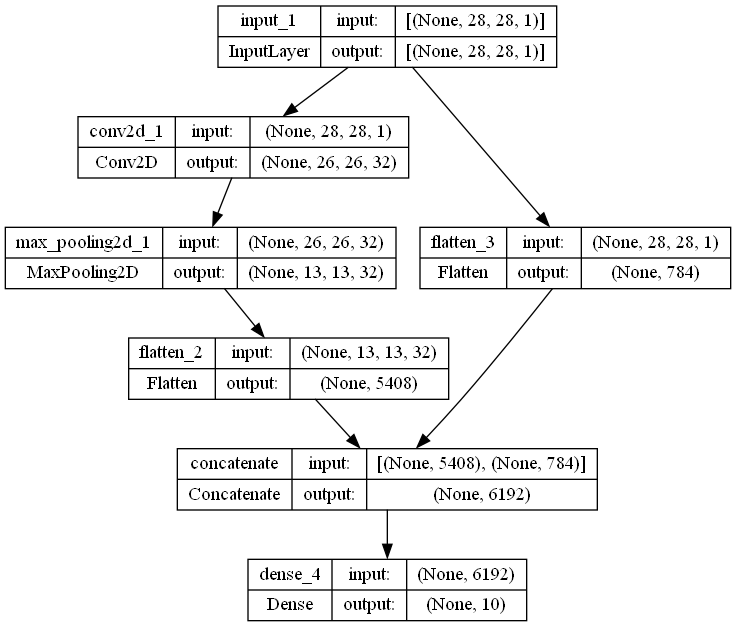

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [47]:
model.compile(optimizer='adam',
             metrics=['acc'],
             loss='sparse_categorical_crossentropy')

In [48]:
history = model.fit(X_train, y_train,
         validation_split=0.2,
         epochs=10)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2253 - acc: 0.9350 - val_loss: 0.1037 - val_acc: 0.9704
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0857 - acc: 0.9749 - val_loss: 0.0800 - val_acc: 0.9765
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0635 - acc: 0.9815 - val_loss: 0.0719 - val_acc: 0.9801
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0525 - acc: 0.9839 - val_loss: 0.0726 - val_acc: 0.9790
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0437 - acc: 0.9868 - val_loss: 0.0686 - val_acc: 0.9807
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0374 - acc: 0.9887 - val_loss: 0.0725 - val_acc: 0.9788
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0314 - acc: 0.9900 - val_loss: 0.0680 - val_acc: 0.9815
Epoch 8/10
1500/1500 [==============================] - 9s 6ms

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - acc: 0.9827


[0.06260299682617188, 0.982699990272522]

In [86]:
# 다중출력
inputs = Input(shape = (28, 28, 1), name='inputs')

conv = Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = MaxPool2D((2, 2), name='maxpool_layer')(conv)
flat = Flatten(name='flatten_layer')(pool)

flat_inputs = Flatten()(inputs)
concat = Concatenate()([flat, flat_inputs])
digits_outputs = Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = Model(inputs, outputs=[digits_outputs, odd_outputs])

In [60]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_3[0][0]']               
                                                                                                  
 flatten_6 (Flatten)            (None, 5408)         0           ['max_pooling2d_3[0][0]']        
                                                                                            

In [61]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'inputs')>

In [62]:
model.output

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]

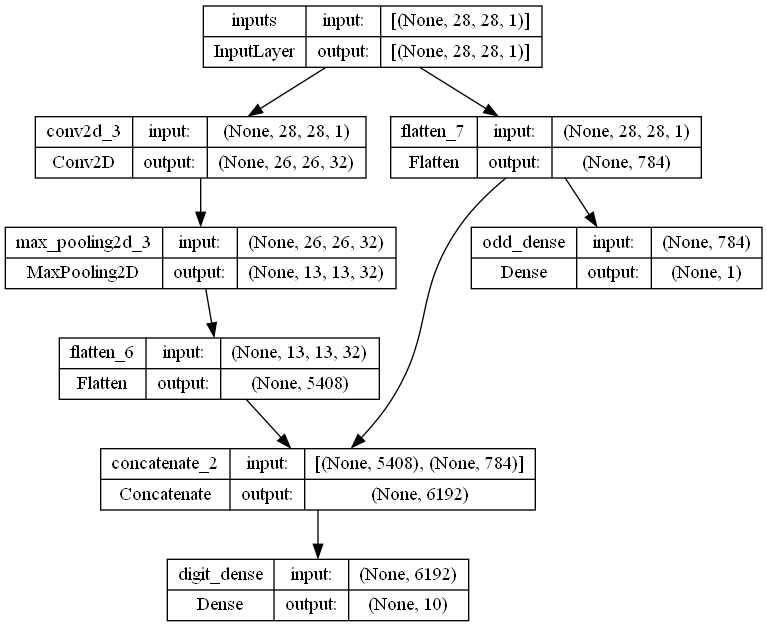

In [63]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [64]:
model.compile(optimizer='adam',
             loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
             metrics = ['acc'],
             loss_weights = {'digit_dense':1, 'odd_dense':0.5})

In [65]:
X_train_in.shape, X_test_in.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [66]:
y_train_odd.shape, y_test_odd.shape

((60000,), (10000,))

In [67]:
history = model.fit({'inputs':X_train_in}, {'digit_dense':y_train,'odd_dense':y_train_odd},
                   validation_data = ({'inputs':X_test_in}, {'digit_dense':y_test, 'odd_dense':y_test_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3713 - digit_dense_loss: 0.2075 - odd_dense_loss: 0.3275 - digit_dense_acc: 0.9400 - odd_dense_acc: 0.8617 - val_loss: 0.2397 - val_digit_dense_loss: 0.1017 - val_odd_dense_loss: 0.2760 - val_digit_dense_acc: 0.9699 - val_odd_dense_acc: 0.8905
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2126 - digit_dense_loss: 0.0766 - odd_dense_loss: 0.2720 - digit_dense_acc: 0.9776 - odd_dense_acc: 0.8905 - val_loss: 0.1967 - val_digit_dense_loss: 0.0649 - val_odd_dense_loss: 0.2637 - val_digit_dense_acc: 0.9782 - val_odd_dense_acc: 0.8968
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1879 - digit_dense_loss: 0.0564 - odd_dense_loss: 0.2630 - digit_dense_acc: 0.9835 - odd_dense_acc: 0.8954 - val_loss: 0.1875 - val_digit_dense_loss: 0.0575 - val_odd_dense_loss: 0.2601 - val_digit_dense_acc: 0.9806 - val_odd_dense_acc: 0.8973
Epoch 4/10
1875/1875 [==========

In [68]:
model.evaluate({'inputs':X_test_in}, {'digit_dense':y_test, 'odd_dense':y_test_odd})

313/313 [==============================] - 1s 2ms/step - loss: 0.1868 - digit_dense_loss: 0.0590 - odd_dense_loss: 0.2555 - digit_dense_acc: 0.9843 - odd_dense_acc: 0.9032


[0.18679428100585938,
 0.0590280219912529,
 0.25553253293037415,
 0.9843000173568726,
 0.9031999707221985]

In [72]:
digits_pred, odd_pred = model.predict(X_test_in)
print(digits_pred[0])
print(odd_pred[0])

313/313 [==============================] - 1s 2ms/step
[3.7321849e-13 1.7008718e-10 2.3214985e-09 9.1540505e-07 2.9577698e-11
 2.5195010e-13 1.1200071e-20 9.9999905e-01 7.3361534e-10 8.1847000e-09]
[0.9996434]


In [75]:
digits_labels = np.argmax(digits_pred, axis=-1)
digits_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [79]:
# 0.5 이상인 경우 홀수로 분류
odd_labels = (odd_pred > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

C:\Users\user\AppData\Local\Temp\ipykernel_18976\961566613.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_pred > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

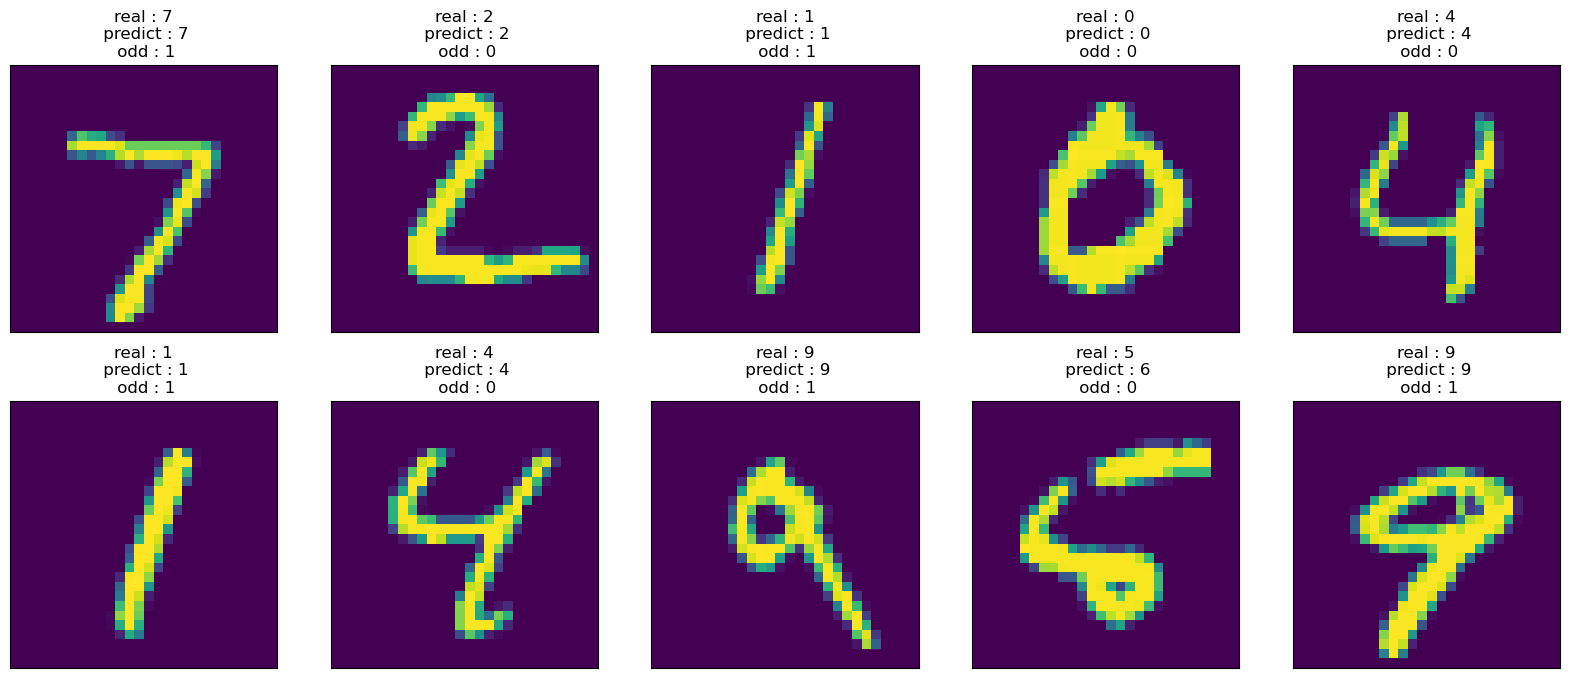

In [83]:
fig = plt.figure(figsize=(20, 8))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_test_in[i])
    plt.title(f'real : {y_test[i]}\n predict : {digits_labels[i]}\n odd : {odd_labels[i]}')

### 📌전이학습(Transfer Learning)

In [87]:
# 앞의 모델에서 flatten_layer 출력 추출
base_model_output = model.get_layer('flatten_layer').output

In [88]:
# 앞의 출력을 출력으로 하는 모델 정의
base_model = Model(inputs = model.input, outputs=base_model_output, name='base')

In [89]:
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [90]:
13*13*32

5408

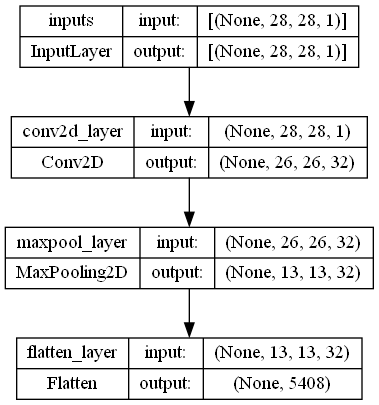

In [93]:
plot_model(base_model, show_shapes=True, show_layer_names=True)

In [95]:
# base_model + 최종 분류기 Dense
digit_model = Sequential([
    base_model,
    Dense(10, activation='softmax')
])

In [96]:
digit_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


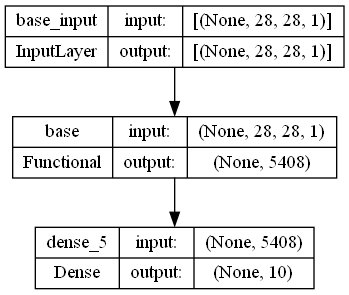

In [98]:
plot_model(digit_model, show_shapes=True, show_layer_names=True)

In [99]:
digit_model.compile(optimizer='adam',
                   metrics=['acc'],
                   loss='sparse_categorical_crossentropy')

In [100]:
history = digit_model.fit(X_train_in, y_train,
                         validation_data = (X_test_in, y_test),
                         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2173 - acc: 0.9392 - val_loss: 0.0983 - val_acc: 0.9705
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0802 - acc: 0.9769 - val_loss: 0.0643 - val_acc: 0.9791
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0593 - acc: 0.9821 - val_loss: 0.0681 - val_acc: 0.9785
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0481 - acc: 0.9858 - val_loss: 0.0562 - val_acc: 0.9824
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0410 - acc: 0.9873 - val_loss: 0.0559 - val_acc: 0.9826
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0335 - acc: 0.9898 - val_loss: 0.0543 - val_acc: 0.9827
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0295 - acc: 0.9910 - val_loss: 0.0528 - val_acc: 0.9832
Epoch 8/10
1875/1875 [==============================] - 9s 5ms

In [101]:
# 베이스 모델 전체의 가중치 고정 ==> 원래 있던 모델의 가중치 사용
base_model_frozen = Model(inputs=model.input,
                         outputs=base_model_output,
                         name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()
# 훈련가능한 parameter의 수 = 0 (320개의 파라미터는 훈련이 불가능)

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [103]:
base_model_frozen.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'inputs')>

In [102]:
base_model_frozen.output

<KerasTensor: shape=(None, 5408) dtype=float32 (created by layer 'flatten_layer')>

In [111]:
dense_output = Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [112]:
digit_model_frozen.compile(optimizer='adam',
                          metrics=['acc'],
                          loss='sparse_categorical_crossentropy')

In [113]:
digit_model_frozen.fit(X_train_in, y_train, 
                       validation_data=(X_test_in, y_test),
                       epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1347 - acc: 0.9647 - val_loss: 0.0625 - val_acc: 0.9806
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0561 - acc: 0.9838 - val_loss: 0.0508 - val_acc: 0.9845
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0424 - acc: 0.9873 - val_loss: 0.0487 - val_acc: 0.9854
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - acc: 0.9900 - val_loss: 0.0561 - val_acc: 0.9827
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0289 - acc: 0.9912 - val_loss: 0.0542 - val_acc: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0238 - acc: 0.9930 - val_loss: 0.0534 - val_acc: 0.9835
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0212 - acc: 0.9937 - val_loss: 0.0513 - val_acc: 0.9843
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

In [117]:
# 특정 레이어의 가중치 고정
# 베이스 모델의 Conv2D 레이어의 가중치 고정
base_model_frozen2 = Model(inputs=model.input, outputs=base_model.output,
                          name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [118]:
dense_output2 = Dense(10, activation='softmax')(base_model_frozen2.output)

In [119]:
digit_model_frozen2 = Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [120]:
digit_model_frozen2.compile(optimizer='adam',
                           metrics=['acc'],
                           loss='sparse_categorical_crossentropy')

In [121]:
digit_model_frozen2.fit(X_train_in, y_train,
                       validation_data=(X_test_in, y_test),
                       epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1339 - acc: 0.9647 - val_loss: 0.0627 - val_acc: 0.9804
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0548 - acc: 0.9844 - val_loss: 0.0525 - val_acc: 0.9831
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - acc: 0.9873 - val_loss: 0.0515 - val_acc: 0.9827
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - acc: 0.9897 - val_loss: 0.0489 - val_acc: 0.9838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - acc: 0.9915 - val_loss: 0.0471 - val_acc: 0.9848
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0239 - acc: 0.9925 - val_loss: 0.0500 - val_acc: 0.9844
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0210 - acc: 0.9938 - val_loss: 0.0510 - val_acc: 0.9846
Epoch 8/10
1875/1875 [==============================] - 5s 3ms